# ***Praktikum 1***

* Lakukan installasi library HDBSCAN

In [20]:
%pip install hdbscan

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


* Lakukan import modul yang dibutuhkan

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import hdbscan
import pandas as pd

## Definisi fungsi visualisasi

* Lakukan ploting dengan warna yang berbeda

In [22]:
def plot(X, labels, probabilites=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilites = probabilites if probabilites is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilites[idx] for idx in  range (len(labels))}

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor = tuple(col),
                markeredgecolor = "k",
                markersize = 4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of cluster: {n_cluster}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k} = {v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

## Membuat dataset sintesis

* Buatlah 3 buah clusters gaussian

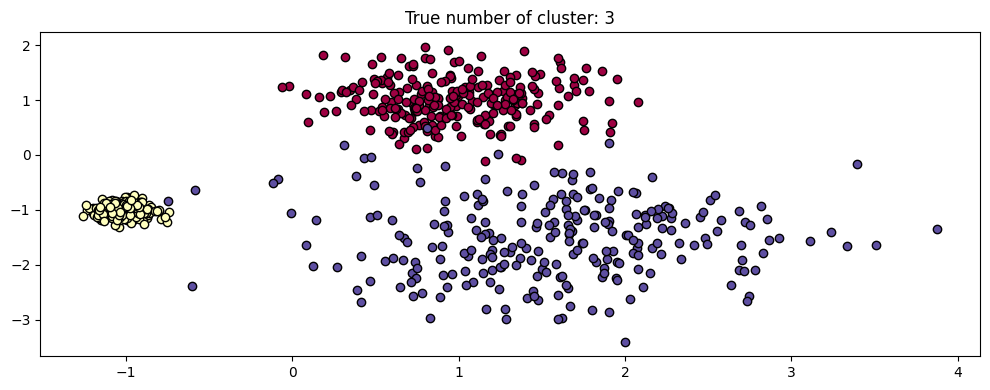

In [23]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0)
plot(X, labels=labels_true, ground_truth=True)

## Uji Scale Invariance pada DBSCAN

* Lakukan pengujian eps = 0,3 pada dataset di scale

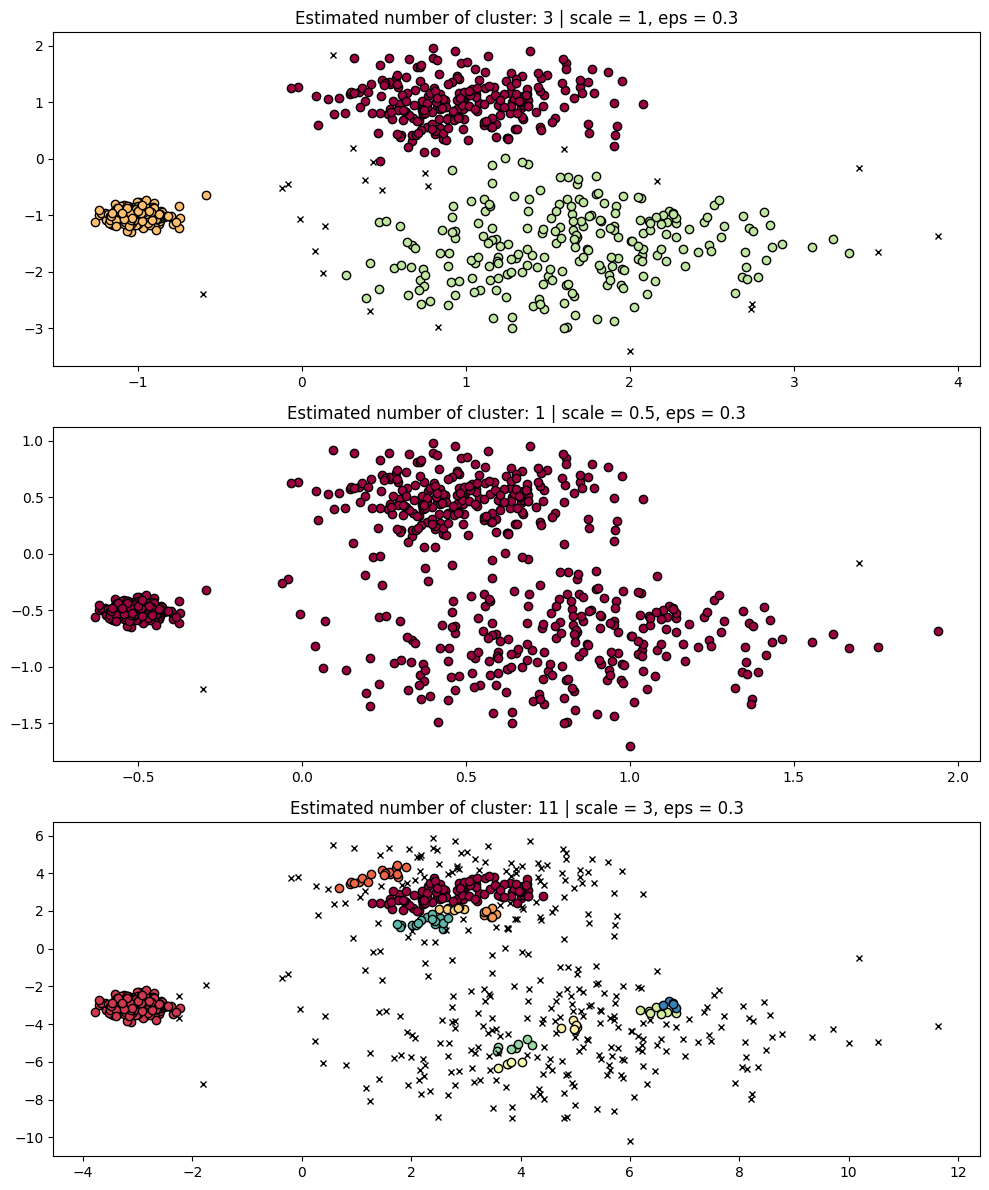

In [24]:
fig, axes = plt.subplots(3, 1, figsize = (10, 12))
dbs = DBSCAN(eps = 0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot (X * scale, dbs.labels_, parameters = {"scale": scale, "eps": 0.3}, ax=axes[idx])

* Lakukan perbaikan scale sesuai dengan skala yang ada 

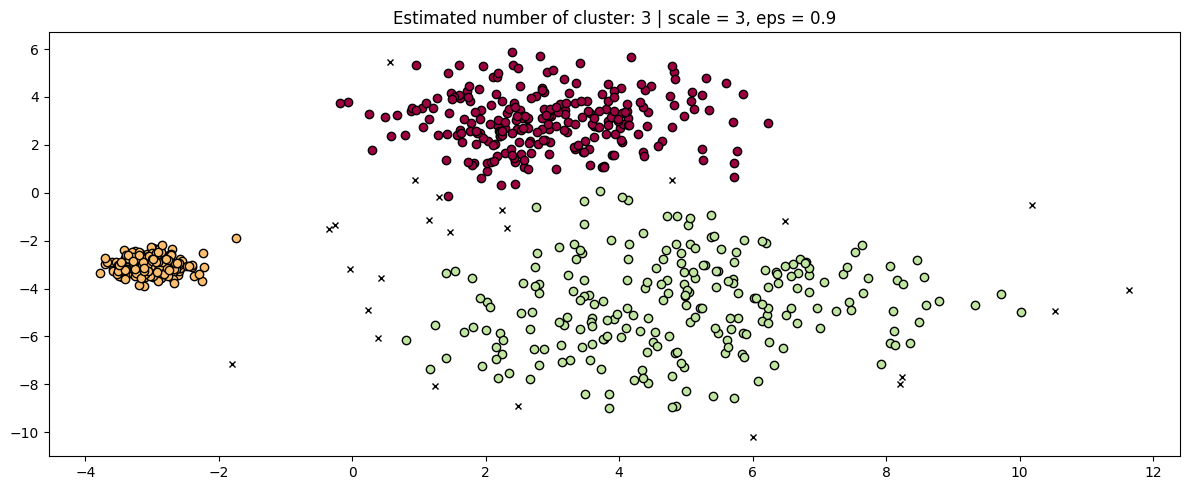

In [25]:
fig, axis = plt.subplots(1, 1, figsize = (12, 5))
dbs = DBSCAN(eps = 0.9).fit(3 *  X)
plot(3 * X, dbs.labels_, parameters = {"scale": 3, "eps": 0.9}, ax = axis)

## Bandingkan dengan HDBSCAN (lebih robust)

* Lakukan perbandingan dbscan dan Hdbscan 

C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarni

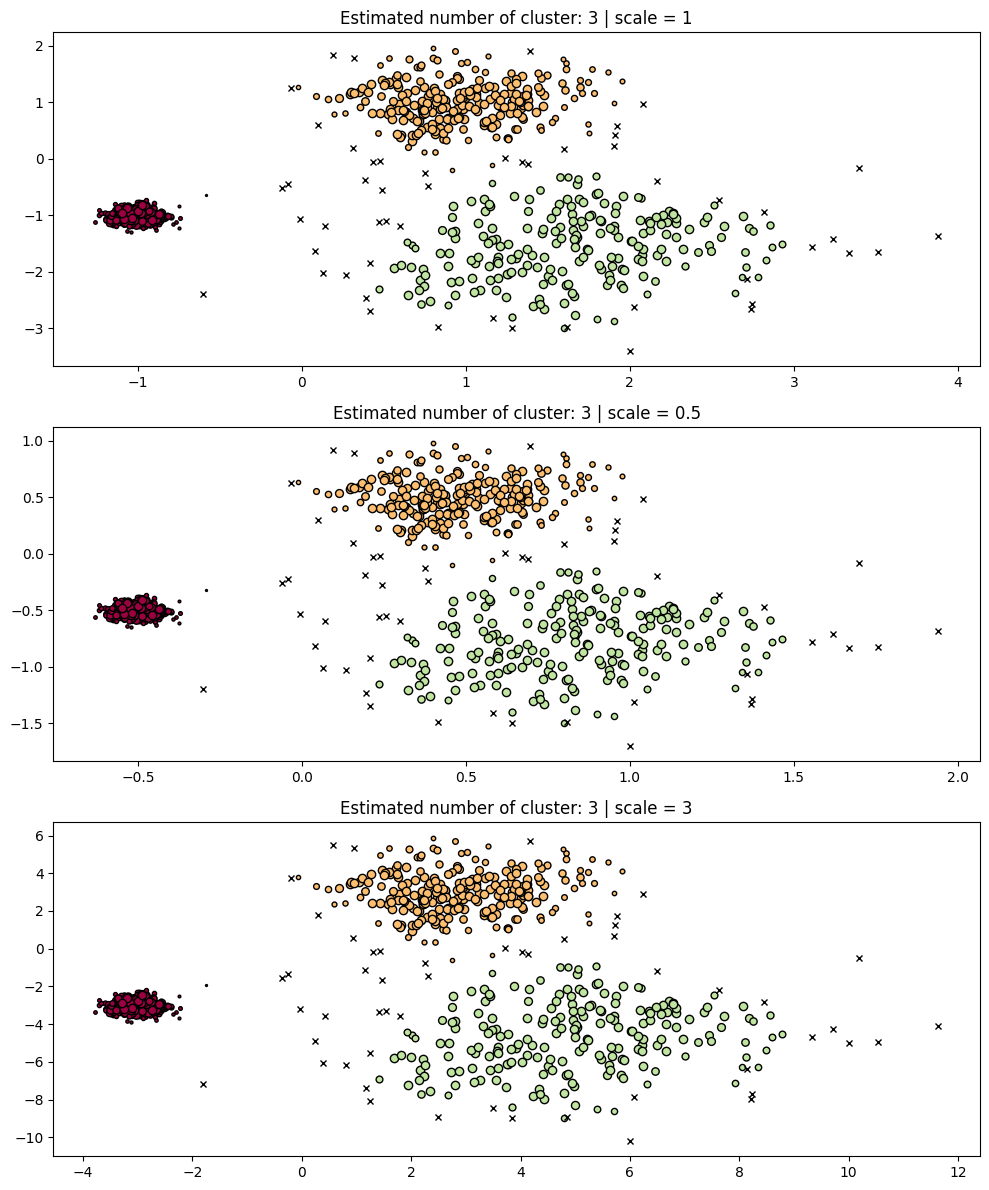

In [26]:
fig, axes = plt.subplots(3, 1, figsize = (10, 12))
hdb = hdbscan.HDBSCAN()
for idx, scale in enumerate([1, 0.5, 3]):
    hdb.fit(X * scale)
    plot(X * scale, hdb.labels_, hdb.probabilities_, ax = axes[idx], parameters = {"scale": scale})

## Multi-Scale Clustering 

* Buat datasets baru dengan kepadatan berbeda

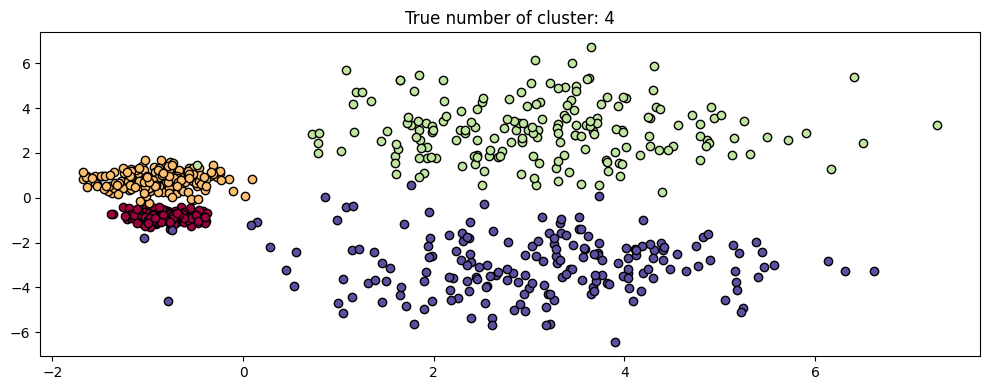

In [27]:
centers =  [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]
X, labels_true = make_blobs(n_samples = 750, centers = centers, cluster_std = [0.2, 0.35, 1.35, 1.35], random_state = 0)
plot(X, labels = labels_true, ground_truth = True)

* Bandingkan DBSCAN dengan nilai eps yang berbeda

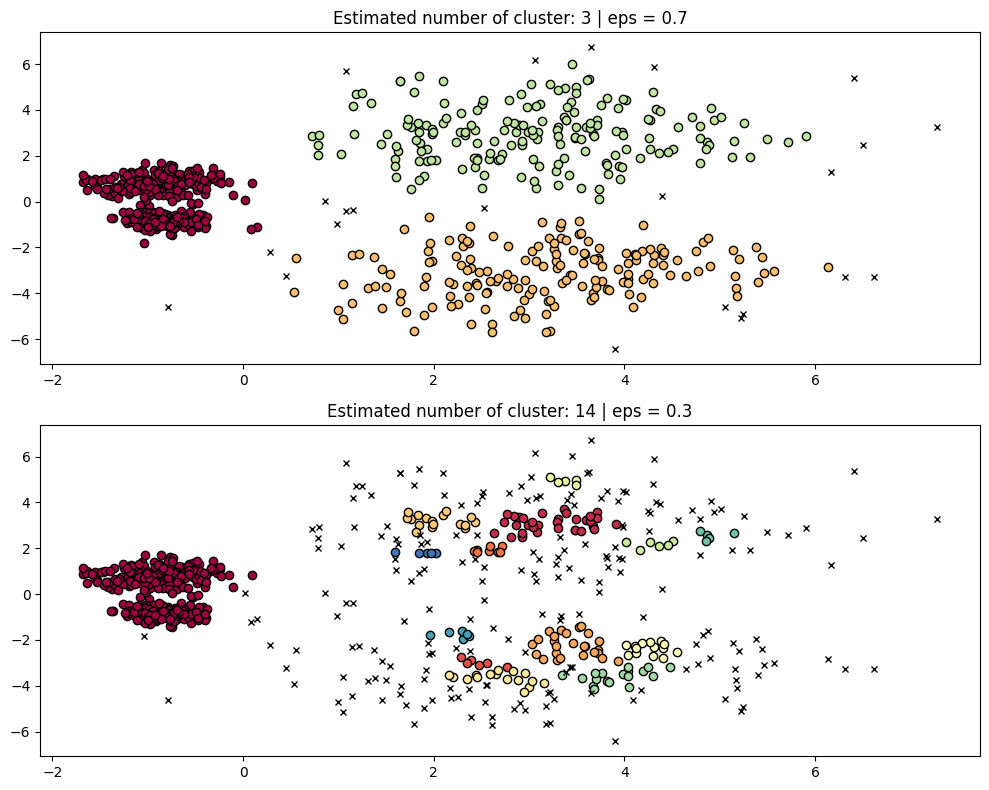

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
params = {"eps": 0.7}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters = params, ax = axes[0])

params = {"eps": 0.3}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters = params, ax = axes[1])

* Jalankan HDBSCAN

C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


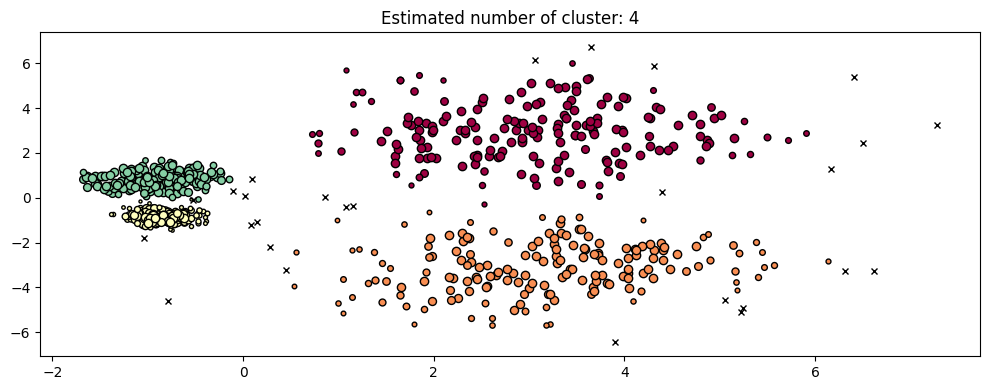

In [29]:
hdb = hdbscan.HDBSCAN().fit(X)
plot(X, hdb.labels_, hdb.probabilities_)

# ***Praktikum 2***

##  Eksperimen Hyperparameter min_cluster_size

* Ubah nilai min_cluster_size

C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarni

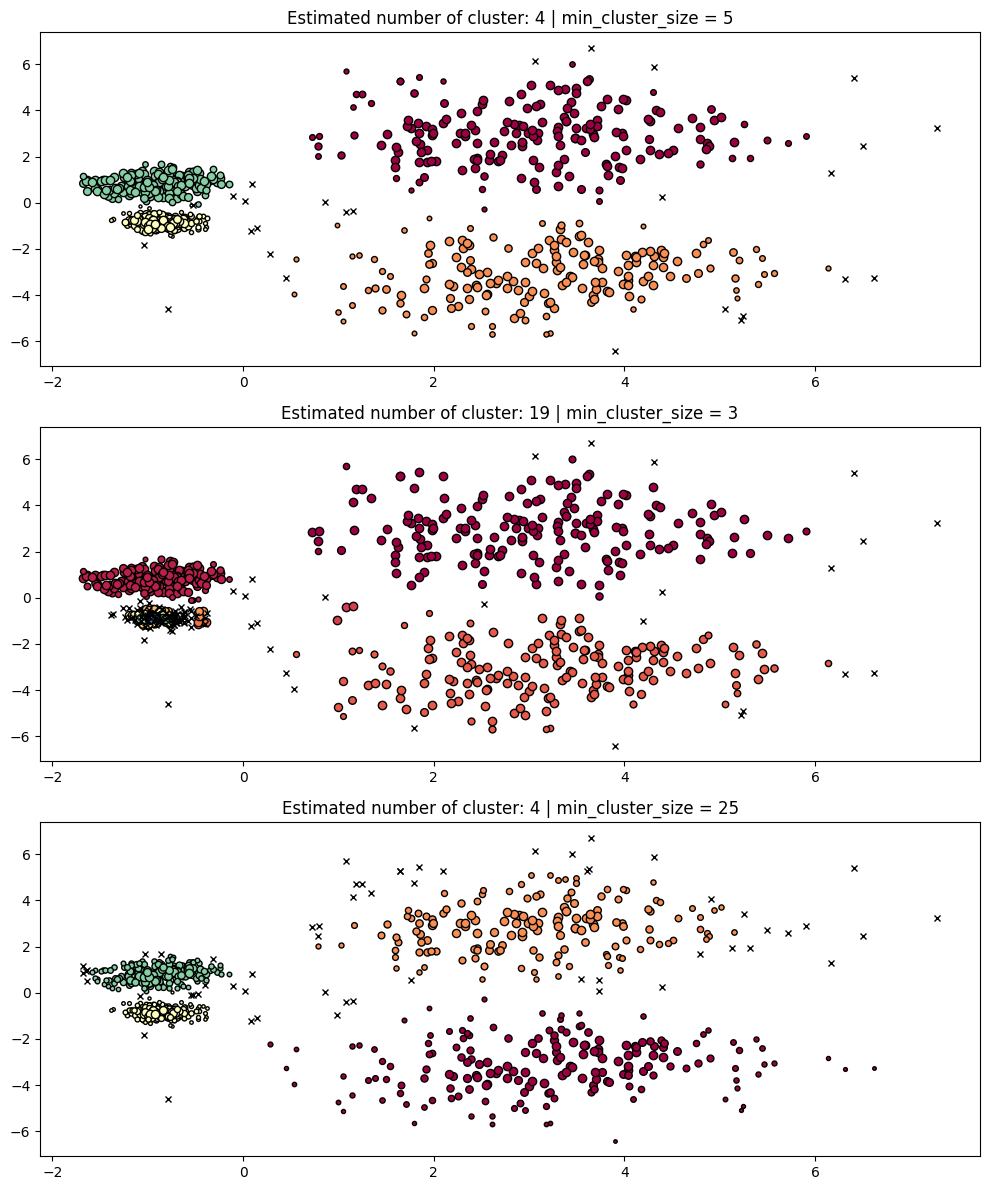

In [30]:
PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize = (10,12))
for i , param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax = axes[i])

## Eksperimen Hyperparameter min_samples

* Ubah nilai min_samples

C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarni

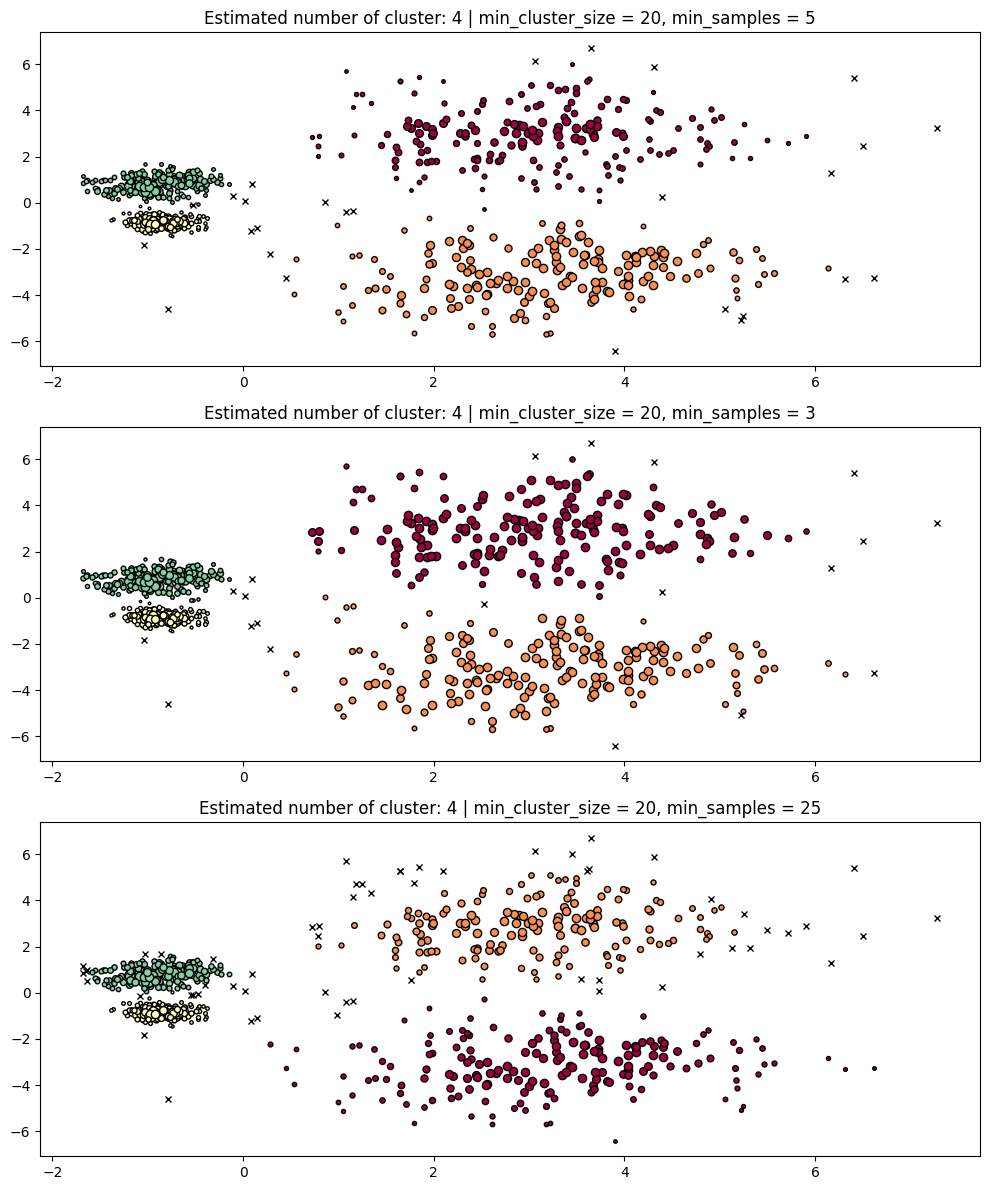

In [31]:
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

 ## DBSCAN Clustering dari Pohon HDBSCAN

* Gunakan parameter cut_distance

C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


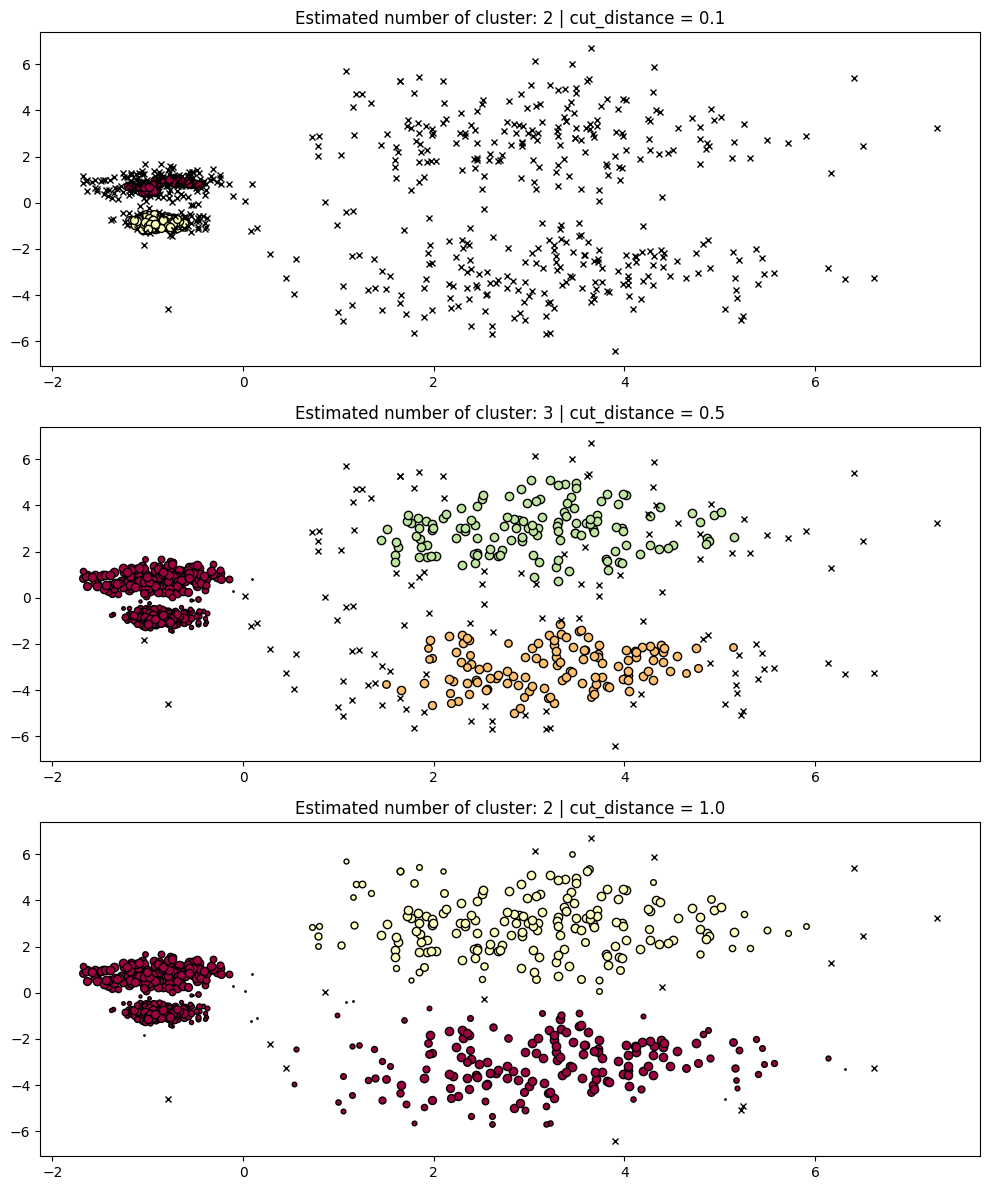

In [32]:
PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)
hdb = hdbscan.HDBSCAN().fit(X)
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    labels = hdb.dbscan_clustering(**param)
    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

## Evaluasi dengan Silhouette Score

* Menghitung silhoute score 

In [33]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk hasil clustering HDBSCAN
sil_score = silhouette_score(X, hdb.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5743816709862986


kluster berjalan dengan baik

## Evaluasi dengan Davies-Bouldin Index

In [34]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index untuk hasil clustering HDBSCAN
dbi_score = davies_bouldin_score(X, hdb.labels_)
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 1.6436030674842066


## Visualisasi Hasil Evaluasi

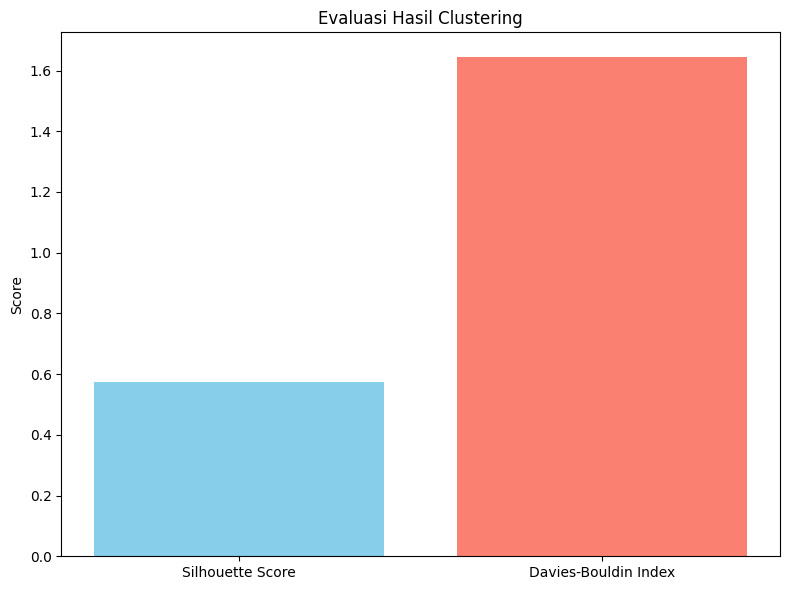

In [35]:
# Misalnya kita ingin membandingkan DBI dan Silhouette Score untuk beberapa eksperimen
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

# Plot hasil evaluasi
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluasi Hasil Clustering")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()

# ***Tugas Praktikum***


Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
Lakukan clustering dengan HDBSCAN.
1. Laporkan hasil:
2. Jumlah cluster yang terbentuk.
3. Banyaknya noise.
4. Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
5. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [52]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [38]:
iris = load_iris()
X = iris.data
Y = iris.target_names[iris.target]
data = pd.DataFrame(X, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
data['Species'] = Y

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(X_scaled)

C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\FANDY HANZ\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [44]:
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)
print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Banyaknya noise: {n_noise}")

Jumlah cluster yang terbentuk: 2
Banyaknya noise: 2


In [48]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [50]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels
df_pca['Species'] = Y


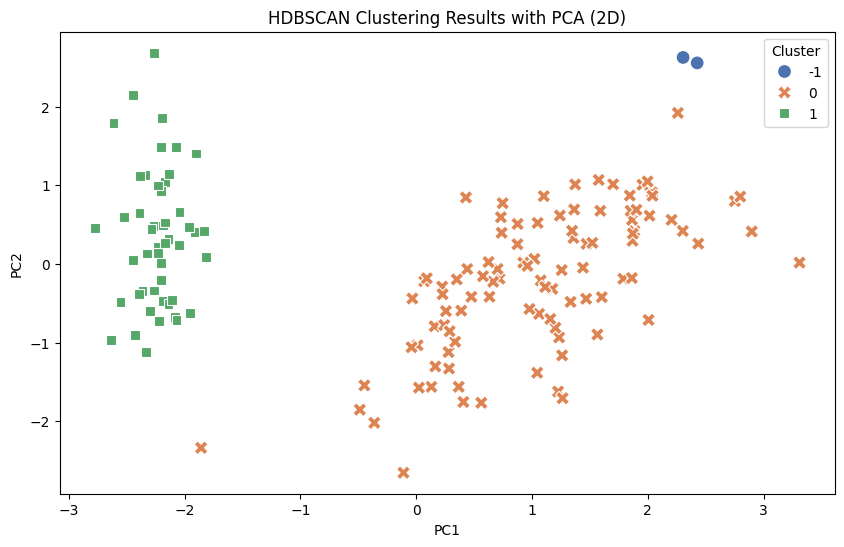

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', style='Cluster', data=df_pca, palette='deep', s=100)
plt.title('HDBSCAN Clustering Results with PCA (2D)')
plt.legend(title='Cluster', loc='best')
plt.show()

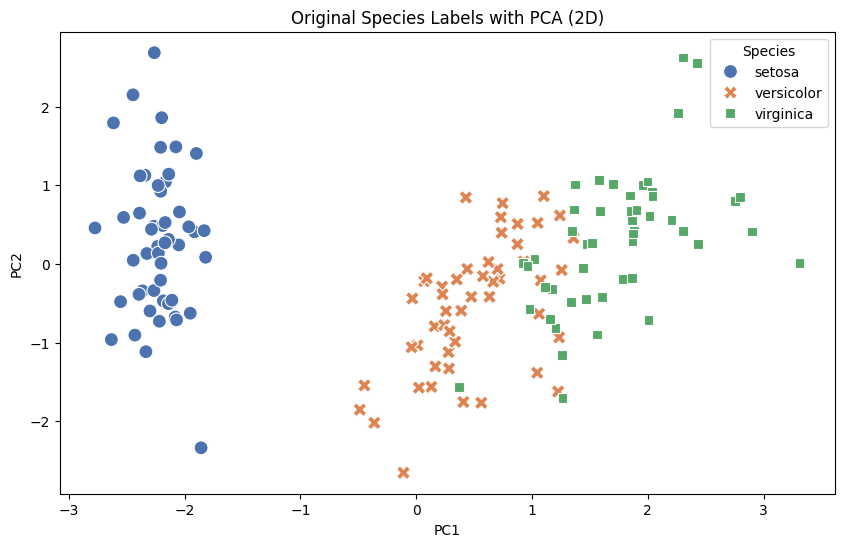

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Species', style='Species', data=df_pca, palette='deep', s=100)
plt.title('Original Species Labels with PCA (2D)')
plt.legend(title='Species', loc='best')
plt.show()

In [55]:
crosstab = pd.crosstab(df_pca['Species'], df_pca['Cluster'])
print("\nPerbandingan Cluster HDBSCAN dengan Label Asli:")
print(crosstab)


Perbandingan Cluster HDBSCAN dengan Label Asli:
Cluster     -1   0   1
Species               
setosa       0   1  49
versicolor   0  50   0
virginica    2  48   0


In [56]:
print("\nAnalisis Singkat:")
print(f"HDBSCAN menghasilkan {n_clusters} cluster dengan {n_noise} titik noise.")
if n_clusters == 2:
    print("Iris-setosa cenderung terdeteksi sebagai satu cluster terpisah karena densitasnya yang berbeda.")
    print("Iris-versicolor dan Iris-virginica sering digabung menjadi satu cluster karena overlap dalam distribusi data.")
else:
    print("Jumlah cluster tidak sesuai dengan jumlah spesies (3), menunjukkan bahwa HDBSCAN lebih sensitif terhadap densitas daripada pemisahan linier.")
print("Gambar 1 menunjukkan hasil clustering HDBSCAN, sementara Gambar 2 menunjukkan label asli (Species).")
print("Perbandingan kedua gambar menunjukkan bahwa Iris-setosa terpisah dengan baik, tetapi Iris-versicolor dan Iris-virginica cenderung tumpang tindih dalam clustering HDBSCAN.")


Analisis Singkat:
HDBSCAN menghasilkan 2 cluster dengan 2 titik noise.
Iris-setosa cenderung terdeteksi sebagai satu cluster terpisah karena densitasnya yang berbeda.
Iris-versicolor dan Iris-virginica sering digabung menjadi satu cluster karena overlap dalam distribusi data.
Gambar 1 menunjukkan hasil clustering HDBSCAN, sementara Gambar 2 menunjukkan label asli (Species).
Perbandingan kedua gambar menunjukkan bahwa Iris-setosa terpisah dengan baik, tetapi Iris-versicolor dan Iris-virginica cenderung tumpang tindih dalam clustering HDBSCAN.
